In [1]:
import os
import pandas as pd
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [2]:
path = '../input/sepsisdata/training'
path_a = '../input/sepsisdata/training/training_setA'
path_b = '../input/sepsisdata/training/training_setB'


In [3]:
y_train = []
X_train = []

for i in os.listdir(path_a):
    data = pd.read_csv(path_a+'/'+i,sep = '|')
    data.drop(['EtCO2','Fibrinogen', 'Unit1', 'Unit2', 'BaseExcess', 'DBP', 'Hct', 'Hgb', 'PTT', 'WBC', 'pH','HCO3','FiO2', 'PaCO2', 'Platelets', 'Magnesium',  'Phosphate',  'Potassium', 'Bilirubin_total',  'TroponinI','SaO2', 'AST','BUN', 'Alkalinephos', 'Bilirubin_direct','Glucose','Lactate', 'Calcium',  'Chloride', 'Creatinine' ],axis = 1,inplace = True)

    data.dropna(thresh=data.shape[1]*0.40,how='all',inplace = True)
    La_1 = data['SepsisLabel'].sum()
    if La_1:
        y_train.append(1)
    else:
        y_train.append(0)
    data.drop(['SepsisLabel'],axis = 1,inplace = True)
    data = data.apply(lambda x: x.fillna(x.median()),axis=0)
    data = data.fillna(0)
    if len(data) < 40:
        Pad = pd.DataFrame({'HR':0.0 ,'O2Sat':0.0, 'Temp':0.0 , 'SBP':0.0, 'MAP':0.0, 'Resp':0.0, 'Age':0.0, 'Gender': 0 ,'HospAdmTime':0.0, 'ICULOS':0}, index =[item for item in range(0,40-len(data))])
        data = pd.concat([Pad, data]).reset_index(drop = True)
    elif len(data) >40:
        data = data[len(data)-40::1]
    data = data.values
    X_train.append(data)

In [4]:
for i in os.listdir(path_b):
    data = pd.read_csv(path_b+'/'+i,sep = '|')
    data.drop(['EtCO2','Fibrinogen', 'Unit1', 'Unit2', 'BaseExcess', 'DBP', 'Hct', 'Hgb', 'PTT', 'WBC', 'pH','HCO3','FiO2', 'PaCO2', 'Platelets', 'Magnesium',  'Phosphate',  'Potassium', 'Bilirubin_total',  'TroponinI','SaO2', 'AST','BUN', 'Alkalinephos', 'Bilirubin_direct','Glucose','Lactate', 'Calcium',  'Chloride', 'Creatinine' ],axis = 1,inplace = True)

    data.dropna(thresh=data.shape[1]*0.40,how='all',inplace = True)
    La_1 = data['SepsisLabel'].sum()
    if La_1:
        y_train.append(1)
    else:
        y_train.append(0)
    data.drop(['SepsisLabel'],axis = 1,inplace = True)
    data = data.apply(lambda x: x.fillna(x.median()),axis=0)
    data = data.fillna(0)
    if len(data) < 40:
        Pad = pd.DataFrame({'HR':0.0 ,'O2Sat':0.0, 'Temp':0.0 , 'SBP':0.0, 'MAP':0.0, 'Resp':0.0, 'Age':0.0, 'Gender': 0 ,'HospAdmTime':0.0, 'ICULOS':0}, index =[item for item in range(0,40-len(data))])
        data = pd.concat([Pad, data]).reset_index(drop = True)
    elif len(data) >40:
        data = data[len(data)-40::1]
    data = data.values
    X_train.append(data)

In [5]:
X, y = np.array(X_train) , np.array(y_train)

In [6]:
print(len(X))

40336


In [7]:
from sklearn.model_selection import train_test_split


X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=45)
print(len(X_train_))

30252


In [8]:
print(len(X_train_))
print(len(X_test_))

30252
10084


In [13]:
model = Sequential()
model.add(LSTM(128, input_shape=(40,10), return_sequences = True))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_, y_train_, epochs=10, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)

Train on 24201 samples, validate on 6051 samples
Epoch 1/10
24201/24201 [==============================] - 124s 5ms/step - loss: 0.0486 - accuracy: 0.9441 - val_loss: 0.0429 - val_accuracy: 0.9458
Epoch 2/10
24201/24201 [==============================] - 124s 5ms/step - loss: 0.0446 - accuracy: 0.9480 - val_loss: 0.0429 - val_accuracy: 0.9468
Epoch 3/10
24201/24201 [==============================] - 125s 5ms/step - loss: 0.0432 - accuracy: 0.9498 - val_loss: 0.0431 - val_accuracy: 0.9484
Epoch 4/10
24201/24201 [==============================] - 126s 5ms/step - loss: 0.0431 - accuracy: 0.9504 - val_loss: 0.0412 - val_accuracy: 0.9519
Epoch 5/10
24201/24201 [==============================] - 124s 5ms/step - loss: 0.0418 - accuracy: 0.9512 - val_loss: 0.0400 - val_accuracy: 0.9514
Epoch 6/10
24201/24201 [==============================] - 125s 5ms/step - loss: 0.0413 - accuracy: 0.9524 - val_loss: 0.0402 - val_accuracy: 0.9537
Epoch 7/10
24201/24201 [==============================] - 124s 

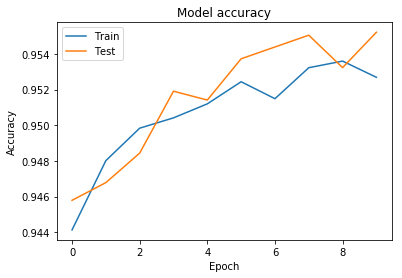

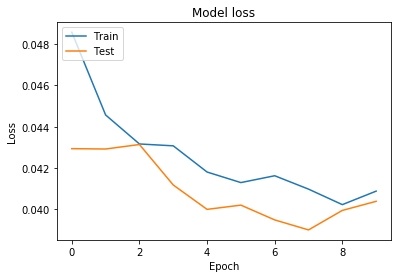

In [14]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
'''
from keras.models import model_from_json
# load json and create model
json_file = open('/kaggle/working/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/kaggle/working/model.h5")
print("Loaded model from disk")'''

'\nfrom keras.models import model_from_json\n# load json and create model\njson_file = open(\'/kaggle/working/model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("/kaggle/working/model.h5")\nprint("Loaded model from disk")'

In [17]:
#y_pred = loaded_model.predict(X_test_)

In [18]:
y_pred = model.predict(X_test_)

In [19]:
from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    dist[k] /= len(X)

acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1
    
final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)


{0: 0.062422306154577695}
[0 0 0 ... 0 0 0]


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_, final_pred)

array([[8993,  297],
       [ 358,  436]])

In [21]:
uniqueValues, occurCount = np.unique(y_pred, return_counts=True)
occurCount

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
uniqueValues, occurCount = np.unique(y_test_, return_counts=True)
occurCount

array([9290,  794])